<a href="https://colab.research.google.com/github/sandhc1/Projects/blob/main/E-Commerce/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('punkt') # punctuations
nltk.download('wordnet') # lemmatisation
nltk.download('stopwords') # stopword removal
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
df = pd.read_csv("/content/data.csv",encoding= 'unicode_escape')

In [5]:
df = df.sample(10000)

In [6]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
367669,568901,22110,BIRD HOUSE HOT WATER BOTTLE,6,9/29/2011 13:22,2.55,15050.0,United Kingdom
441476,574575,20931,BLUE POT PLANT CANDLE,1,11/4/2011 17:03,2.95,14971.0,United Kingdom
189989,553178,21326,AGED GLASS SILVER T-LIGHT HOLDER,1,5/15/2011 11:29,0.65,17302.0,United Kingdom
243924,558475,90197B,BLACK GLASS BRACELET W HEART CHARMS,1,6/29/2011 15:58,4.98,NaN,United Kingdom
44222,540161,22451,SILK PURSE BABUSHKA RED,3,1/5/2011 11:52,3.35,16719.0,United Kingdom
444579,574734,22622,BOX OF VINTAGE ALPHABET BLOCKS,1,11/6/2011 15:20,11.95,15025.0,United Kingdom
77885,542791,22366,DOORMAT AIRMAIL,1,2/1/2011 10:47,7.95,15039.0,United Kingdom
290964,562420,23050,RECYCLED ACAPULCO MAT GREEN,1,8/4/2011 16:38,16.63,NaN,United Kingdom
245097,558572,21931,JUMBO STORAGE BAG SUKI,10,6/30/2011 14:47,2.08,14282.0,United Kingdom
215739,555731,21204,DAISIES HONEYCOMB GARLAND,12,6/7/2011 7:49,1.65,16655.0,United Kingdom


In [7]:
df.shape

(10000, 8)

In [8]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description      22
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2494
Country           0
dtype: int64

# **Data Cleaning**

# **Invoice**

As Invoice Number has Unique value for every transaction.

we are deleting the column.

In [9]:
df.drop(columns='InvoiceNo', inplace=True)

In [10]:
df.shape

(10000, 7)

# **Stock Code**

No null values. 

There are 4070 unique stock code values.

In [11]:
df.StockCode.isnull().sum()

0

In [12]:
df.StockCode.dtypes

dtype('O')

In [13]:
df.StockCode.value_counts()

85123A    50
20725     46
47566     40
POST      38
22386     35
          ..
22166      1
22430      1
20802      1
22164      1
47567B     1
Name: StockCode, Length: 2418, dtype: int64

# **Description**

0.26 % are missing values.

so, we are deleting those rows.

In [14]:
df.Description.isnull().sum()

22

In [15]:
print("{0} of missing percentage in Description Column ".format((df.Description.isnull().sum()/df.shape[0])*100))

0.22 of missing percentage in Description Column 


In [16]:
df.dropna(subset=['Description'],inplace=True)

In [17]:
df.shape

(9978, 7)

In [18]:
df.Description.dtypes

dtype('O')

In [19]:
df.drop_duplicates(subset='Description',inplace=True)

In [20]:
df.shape

(2433, 7)

In [21]:
df.Description.unique()

array(['REGENCY SUGAR BOWL GREEN', 'ASSORTED COLOURS SILK FAN',
       'SILVER BELLS TABLE DECORATION', ...,
       'FRENCH BLUE METAL DOOR SIGN 1', 'ASSORTED TUTTI FRUTTI MIRROR',
       'TEA TIME KITCHEN APRON'], dtype=object)

In [22]:
df.Description.nunique()

2433

# **Quantity**

In [23]:
df.Quantity.isnull().sum()

0

In [24]:
df.Quantity.dtypes

dtype('int64')

# **Invoice Date**

Converted into date time format

In [25]:
df.InvoiceDate.isnull().sum()

0

In [26]:
df.InvoiceDate.dtypes

dtype('O')

In [27]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [28]:
df.InvoiceDate

205564   2011-05-26 14:08:00
392202   2011-10-11 16:37:00
397773   2011-10-14 12:41:00
47356    2011-01-07 10:27:00
414576   2011-10-24 13:28:00
                 ...        
287587   2011-08-02 15:40:00
56354    2011-01-13 14:29:00
519847   2011-12-02 11:53:00
165395   2011-04-20 14:02:00
303135   2011-08-17 10:56:00
Name: InvoiceDate, Length: 2433, dtype: datetime64[ns]

In [29]:
df['InvoiceDate'] = df.InvoiceDate.dt.strftime('%d/%m/%Y')

In [30]:
df['InvoiceDate']

205564    26/05/2011
392202    11/10/2011
397773    14/10/2011
47356     07/01/2011
414576    24/10/2011
             ...    
287587    02/08/2011
56354     13/01/2011
519847    02/12/2011
165395    20/04/2011
303135    17/08/2011
Name: InvoiceDate, Length: 2433, dtype: object

In [31]:
df.InvoiceDate.dtypes

dtype('O')

# **Unit Price**

In [32]:
df.UnitPrice.isnull().sum()

0

In [33]:
df.UnitPrice.dtypes

dtype('float64')

# **Customer ID**

24% customer ID's are missing.

so, we are deleting those rows.

In [34]:
df.CustomerID.isnull().sum()

687

In [35]:
print("{0} of missing values in customerID".format((df.CustomerID.isnull().sum()/df.shape[0])*100))

28.236744759556103 of missing values in customerID


In [36]:
df.dropna(subset=['CustomerID'],inplace=True)

In [37]:
df.shape

(1746, 7)

In [38]:
df.CustomerID.dtypes

dtype('float64')

In [39]:
df.CustomerID = df.CustomerID.astype('int64')

In [40]:
df.CustomerID.dtypes

dtype('int64')

# **Country**

In [41]:
df.Country.isnull().sum()

0

In [42]:
df.Country.unique()

array(['United Kingdom', 'Norway', 'Germany', 'Netherlands', 'France',
       'Israel', 'EIRE', 'Channel Islands', 'Cyprus', 'Switzerland',
       'Australia', 'Denmark', 'Italy', 'Austria', 'Portugal', 'Finland',
       'Sweden', 'Spain', 'Belgium', 'Japan', 'Canada', 'USA',
       'Unspecified', 'Iceland', 'Malta'], dtype=object)

In [43]:
df.Country.value_counts()

United Kingdom     1567
France               35
Germany              34
EIRE                 34
Netherlands           9
Switzerland           9
Norway                8
Spain                 7
Channel Islands       6
Portugal              6
Belgium               4
Sweden                4
Italy                 4
Australia             3
Austria               2
Finland               2
Israel                2
Canada                2
Malta                 2
Denmark               1
Cyprus                1
Japan                 1
USA                   1
Unspecified           1
Iceland               1
Name: Country, dtype: int64

# **NLP - Description**

# **Remove Punctuation**








In [44]:
df.Description[0:20]

205564               REGENCY SUGAR BOWL GREEN
397773          SILVER BELLS TABLE DECORATION
47356       SET OF 3 CAKE TINS PANTRY DESIGN 
414576    SILVER GLITTER FLOWER VOTIVE HOLDER
326426          TRAVEL CARD WALLET UNION JACK
327913         CREAM CUPID HEARTS COAT HANGER
430181          BAKING SET 9 PIECE RETROSPOT 
347517      CHILDRENS CUTLERY POLKADOT GREEN 
63529       PINK 3 PIECE POLKADOT CUTLERY SET
203673                 TEA TIME PARTY BUNTING
426416                     JUMBO BAG ALPHABET
147767           PINK UNION JACK  LUGGAGE TAG
267100           RED SPOT CERAMIC DRAWER KNOB
390217           MISTLETOE HEART WREATH GREEN
453980       PACK OF 12 VINTAGE DOILY TISSUES
273888              12 PENCILS TALL TUBE POSY
192145          TABLECLOTH RED APPLES DESIGN 
271816          DOORMAT KEEP CALM AND COME IN
186476        SCANDINAVIAN PAISLEY PICNIC BAG
380147                                POSTAGE
Name: Description, dtype: object

In [45]:
df['Cleaned_Description'] = df['Description'].str.replace("[^a-zA-Z0-9 ]","")
df['Cleaned_Description'][0:20]

<ipython-input-45-671ec1f93a28>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Description'] = df['Description'].str.replace("[^a-zA-Z0-9 ]","")


205564               REGENCY SUGAR BOWL GREEN
397773          SILVER BELLS TABLE DECORATION
47356       SET OF 3 CAKE TINS PANTRY DESIGN 
414576    SILVER GLITTER FLOWER VOTIVE HOLDER
326426          TRAVEL CARD WALLET UNION JACK
327913         CREAM CUPID HEARTS COAT HANGER
430181          BAKING SET 9 PIECE RETROSPOT 
347517      CHILDRENS CUTLERY POLKADOT GREEN 
63529       PINK 3 PIECE POLKADOT CUTLERY SET
203673                 TEA TIME PARTY BUNTING
426416                     JUMBO BAG ALPHABET
147767           PINK UNION JACK  LUGGAGE TAG
267100           RED SPOT CERAMIC DRAWER KNOB
390217           MISTLETOE HEART WREATH GREEN
453980       PACK OF 12 VINTAGE DOILY TISSUES
273888              12 PENCILS TALL TUBE POSY
192145          TABLECLOTH RED APPLES DESIGN 
271816          DOORMAT KEEP CALM AND COME IN
186476        SCANDINAVIAN PAISLEY PICNIC BAG
380147                                POSTAGE
Name: Cleaned_Description, dtype: object

# **LowerCase characters**

In [46]:
df['Cleaned_Description'] = [review.lower() for review in df['Cleaned_Description']] 
df['Cleaned_Description'][0:20]

205564               regency sugar bowl green
397773          silver bells table decoration
47356       set of 3 cake tins pantry design 
414576    silver glitter flower votive holder
326426          travel card wallet union jack
327913         cream cupid hearts coat hanger
430181          baking set 9 piece retrospot 
347517      childrens cutlery polkadot green 
63529       pink 3 piece polkadot cutlery set
203673                 tea time party bunting
426416                     jumbo bag alphabet
147767           pink union jack  luggage tag
267100           red spot ceramic drawer knob
390217           mistletoe heart wreath green
453980       pack of 12 vintage doily tissues
273888              12 pencils tall tube posy
192145          tablecloth red apples design 
271816          doormat keep calm and come in
186476        scandinavian paisley picnic bag
380147                                postage
Name: Cleaned_Description, dtype: object

# **Stop Word Removal**

In [47]:
stop_words = stopwords.words('english')

# function to remove stop words
# input as row
# break into words
# check whether it is in stop words or not.

def remove_stopwords(rev):
    rev_tokenize = word_tokenize(rev)
    rev_new = " ".join([i for i in rev_tokenize  if i not in stop_words])
    return rev_new

df['Cleaned_Description'] = [remove_stopwords(r) for r in df['Cleaned_Description']]
df['Cleaned_Description'][0:20]

205564               regency sugar bowl green
397773          silver bells table decoration
47356           set 3 cake tins pantry design
414576    silver glitter flower votive holder
326426          travel card wallet union jack
327913         cream cupid hearts coat hanger
430181           baking set 9 piece retrospot
347517       childrens cutlery polkadot green
63529       pink 3 piece polkadot cutlery set
203673                 tea time party bunting
426416                     jumbo bag alphabet
147767            pink union jack luggage tag
267100           red spot ceramic drawer knob
390217           mistletoe heart wreath green
453980          pack 12 vintage doily tissues
273888              12 pencils tall tube posy
192145           tablecloth red apples design
271816                 doormat keep calm come
186476        scandinavian paisley picnic bag
380147                                postage
Name: Cleaned_Description, dtype: object

# **Lemmatization**

In [48]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using parts of speech tag
def lemmatize_sentence(sentence):
    
    # tokenize the sentence and find the POS tag for each token
    # tuple of (token, wordnet_tag)
    # list of tuples
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
    
    
    # we dont need to detailed of POS. So we convert.
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: lemmatize_sentence(x))
df['Cleaned_Description'][0:20]

205564               regency sugar bowl green
397773           silver bell table decoration
47356            set 3 cake tin pantry design
414576    silver glitter flower votive holder
326426          travel card wallet union jack
327913          cream cupid heart coat hanger
430181             bake set 9 piece retrospot
347517       childrens cutlery polkadot green
63529       pink 3 piece polkadot cutlery set
203673                 tea time party bunting
426416                     jumbo bag alphabet
147767            pink union jack luggage tag
267100           red spot ceramic drawer knob
390217           mistletoe heart wreath green
453980           pack 12 vintage doily tissue
273888               12 pencil tall tube posy
192145            tablecloth red apple design
271816                 doormat keep calm come
186476        scandinavian paisley picnic bag
380147                                postage
Name: Cleaned_Description, dtype: object

# **Plotting Freqent Words**

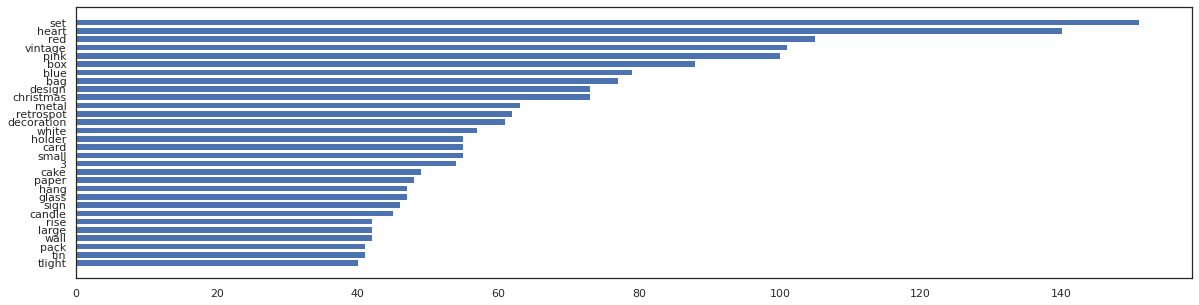

In [49]:
# Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')

# function to find the frequent words in the data
from nltk import FreqDist 

#Extracts words into list and count frequency
all_words = ' '.join([text for text in df['Cleaned_Description']])
all_words = all_words.split()
words_df = FreqDist(all_words)


# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

# **WordCloud**

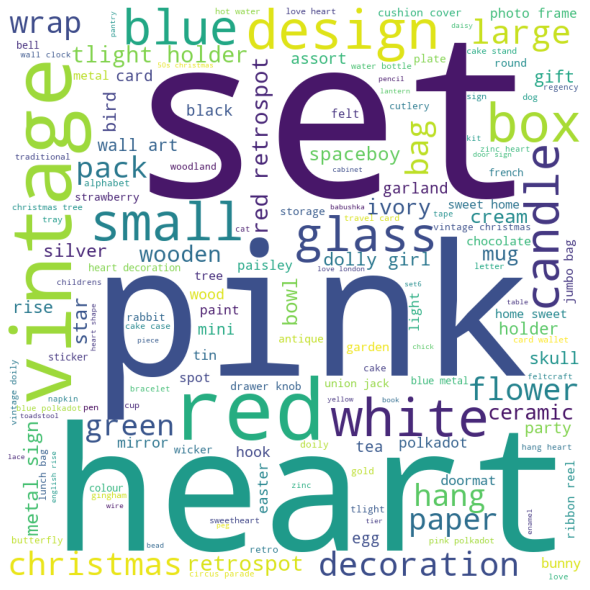

In [50]:
# Bilding a Word Cloud

from wordcloud import WordCloud
all_words = ' '.join([text for text in df['Cleaned_Description']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# **Bag of Words Model**

In [51]:
tfidf_vectorizer = TfidfVectorizer(max_features=2500) # Intialise the model 
values = tfidf_vectorizer.fit_transform(df['Cleaned_Description'])

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
df_nlp = pd.DataFrame(values.toarray(), columns = feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
df.shape

(1746, 8)

In [53]:
df_new = df.join(df_nlp)
df_new.shape

(1746, 1276)

In [54]:
df_new.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cleaned_Description,10,11,...,world,woven,wrap,wreath,write,yellow,yellowpink,yuletide,zinc,zincglass
205564,23174,REGENCY SUGAR BOWL GREEN,6,26/05/2011,4.15,15622,United Kingdom,regency sugar bowl green,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397773,23100,SILVER BELLS TABLE DECORATION,12,14/10/2011,1.25,15620,United Kingdom,silver bell table decoration,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47356,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,07/01/2011,4.95,13842,United Kingdom,set 3 cake tin pantry design,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414576,85111,SILVER GLITTER FLOWER VOTIVE HOLDER,36,24/10/2011,0.29,14997,United Kingdom,silver glitter flower votive holder,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326426,22997,TRAVEL CARD WALLET UNION JACK,2,05/09/2011,0.42,14159,United Kingdom,travel card wallet union jack,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_new.drop(columns='Description',inplace=True)

In [56]:
df_new.drop(columns=['StockCode','InvoiceDate','Cleaned_Description','Country'],axis=1,inplace=True)

In [57]:
df_new.head()

,Quantity,UnitPrice,CustomerID,10,11,12,120cm,125g,15c,16,...,world,woven,wrap,wreath,write,yellow,yellowpink,yuletide,zinc,zincglass
205564,6,4.15,15622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397773,12,1.25,15620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47356,3,4.95,13842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414576,36,0.29,14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326426,2,0.42,14159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_new.shape

(1746, 1271)

In [59]:
df_new.fillna(0,inplace=True)

In [60]:
df_new.head()

,Quantity,UnitPrice,CustomerID,10,11,12,120cm,125g,15c,16,...,world,woven,wrap,wreath,write,yellow,yellowpink,yuletide,zinc,zincglass
205564,6,4.15,15622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397773,12,1.25,15620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47356,3,4.95,13842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414576,36,0.29,14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326426,2,0.42,14159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df_new) # standardise data

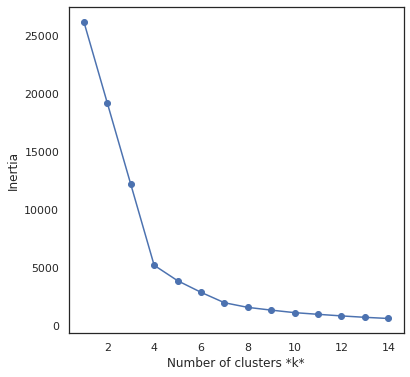

In [62]:
# Elbow plot
# We make a plot between k value and inertia

# store inertia for all values of k 
inertias = []  
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');

No.of clusters in products = 4

In [65]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4) # applying k = 6
km.fit(X_std) # fit the data - identify pattern, does everything

KMeans(n_clusters=4)

In [66]:
# final centroid points
centroids = km.cluster_centers_ 
print("final centroid points: ",centroids)

# tells which data point belongs to which cluster 0/1.
print(km.labels_) 

# measures how tight my groups are.
print(km.inertia_)

final centroid points:  [[ 3.49036254e-04  7.05420474e-04 -2.62498952e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.77198270e-01 -3.09061352e-01  1.52511891e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.65585960e-01 -5.00125612e-01  1.52511891e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.65585960e-01 -4.20360921e-01  1.52511891e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0 0 0 ... 0 0 0]
5230.354922835582
